# Root finding with the Newton-Raphson method
This notebook demonstrates the use of the Newton-Raphson method

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Unlike the bisection method, which only required a continuous function, the Newton-Raphson method requires the function and its derivative. In the first example we'll use a quadratic with roots at $x=\{-3,2\}$

In [8]:
def f(x):
    return (x-2)*(x+3)

def df(x):
    return 2*x + 1

The below function is a modification of the one we looked at in the lectures which also plots the steps of the method

In [24]:
# Function that plots the steps of the Newton-Raphson method
# f - the function
# df - the derivative of the function
# nmax - the maximum number of steps to take
# plotxmin - the minimum x-value used when plotting the function
# plotxmax - the maximum x-value used when plotting the function
def FindRootNewtonRaphson(f, df, x0, nmax, plotxmin, plotxmax):
    x = np.arange(plotxmin, plotxmax, 0.1)
    vf = np.vectorize(f)
    vdf = np.vectorize(df)
    y = vf(x)
    
    plt.rcParams['figure.figsize'] = 10, 7
    plt.grid(True)    
    plt.plot(x, y, 'r')
    
    f0 = f(x0)
    
    xn = x0
    
    n = 0
    while n < nmax:
        f0 = f(xn)
        df0 = df(xn)
        
        xn1 = xn - f0/df0  
        print("At iteration x_%d = %.16f" % (n, xn1))
        
        if(xn1 > xn):
            xmax = xn1
            xmin = xn
        else:
            xmax = xn
            xmin = xn1
        
        xtangent = np.arange(xmin, xmax, 0.1)
        
        tangent = f0 + df0*(xtangent - xn)
        plt.vlines(x=xn1, ymin=0, ymax=f(xn1), colors='black', linestyles = 'dashed')
        plt.plot(xtangent, tangent, 'b' )
        
        xn = xn1
        
        n += 1
        
        

    return xn

At iteration x_0 = 6.0000000000000000
At iteration x_1 = 3.2307692307692308
At iteration x_2 = 2.2030134813639970
At iteration x_3 = 2.0076238009724490
At iteration x_4 = 2.0000115891269745
At iteration x_5 = 2.0000000000268616
At iteration x_6 = 2.0000000000000000


2.0

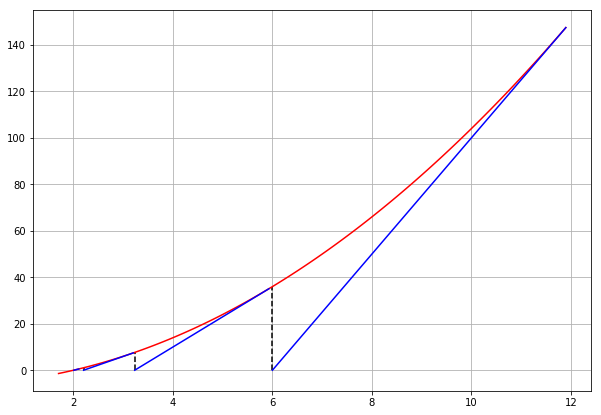

In [25]:
FindRootNewtonRaphson(f, df, 12, 7, 1.7, 12)

Let's define a new function (and its derivative) to investigate cases where the method does not converge. For this we'll use $f(x) = \sinh^{-1} x$. This function has a root at $x=0$.

In [18]:
def ArcSinh(x):
    return np.arcsinh(x)

In [19]:
def dArcSinh(x):
    return 1/np.sqrt(1 + x**2)

If we start the method with an initial value near the root it converges

At iteration x_0 = -1.9353055993267247
At iteration x_1 = 1.1456499121600103
At iteration x_2 = -0.3457089572277832
At iteration x_3 = 0.0131556966755410
At iteration x_4 = -0.0000007589099315
At iteration x_5 = 0.0000000000000000


1.4568966692773966e-19

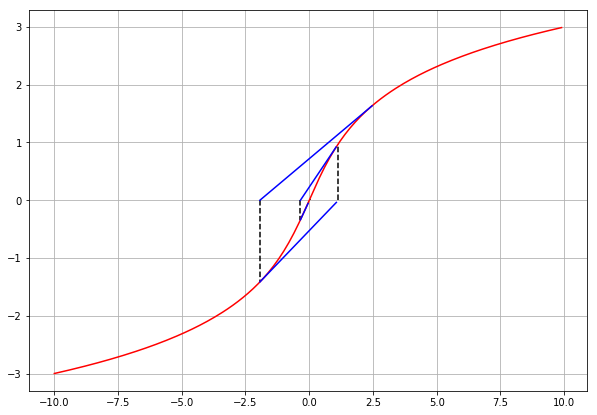

In [23]:
FindRootNewtonRaphson(ArcSinh, dArcSinh, 2.5, 6, -10, 10)

We can find a value of the initial guess where the method diverges. As we iterate more the result gets further from the root!

At iteration x_0 = -3.4678616578019885
At iteration x_1 = 3.5947442192739580
At iteration x_2 = -3.8357611794740838
At iteration x_3 = 4.3065888908388033
At iteration x_4 = -5.2719030676225511
At iteration x_5 = 7.4153270859790990


7.415327085979099

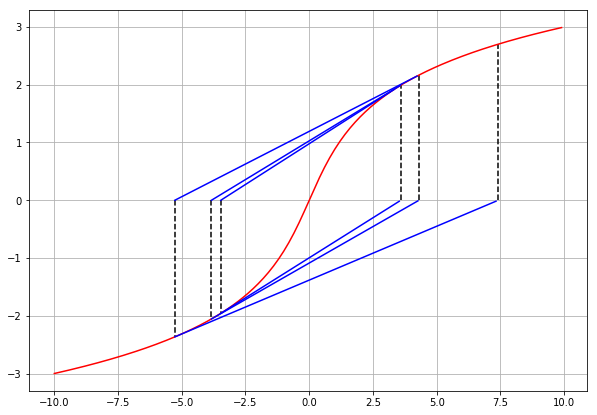

In [41]:
FindRootNewtonRaphson(ArcSinh, dArcSinh, 3.4, 6, -10, 10)

Between the two cases above there is a critical value where the method just loops between $\{x_0, F(x_0), x_0, F(x_0),\dots\}$ where $F(x) = x - f(x)/f'(x)$

At iteration x_0 = -3.3198263863951483
At iteration x_1 = 3.3198263863951483
At iteration x_2 = -3.3198263863951483
At iteration x_3 = 3.3198263863951483
At iteration x_4 = -3.3198263863951483
At iteration x_5 = 3.3198263863951483


3.3198263863951483

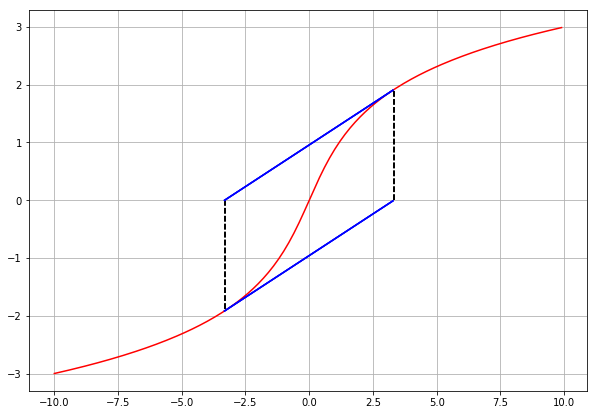

In [44]:
FindRootNewtonRaphson(ArcSinh, dArcSinh, 3.3198263863951484339, 6, -10, 10)